In [22]:
import math
import random
import matplotlib.pyplot as plt
plots = []

In [23]:
def superposition(qubits):
    states = []
    #Hadamard Transformation
    total_states = int(math.pow(2,qubits))
    amplitude = 1/math.sqrt(total_states)
    for _ in range(0,total_states):
        states.append(amplitude)
    return states

In [24]:
def grover_diffusion(states):
    average = sum(states)/len(states)
    for i in range(0,len(states)):
        states[i] = (average-states[i]) + average
    return states

In [25]:
def oracle(states,datalist,key):
    for i in range(0,int(len(datalist))):
        if datalist[i] == key:
            states[i] *= -1 #phase inversion
    return states

In [26]:
def grover_iteration(datalist,j,y):
    num_iterations = j
    qubits_needed = math.ceil(math.log(len(datalist),2))
    states = superposition(qubits_needed)
    for _ in range(0,num_iterations):
        states = oracle(states,datalist,y)
        states = grover_diffusion(states)
    probability_states = [states[i]*states[i] for i in range(0,len(states))]
    plots.append(probability_states)
    max_value = max(probability_states)
    for i in range(len(probability_states)):
        if probability_states[i] == max_value:
            return i
   

In [27]:
def exponential_search(datalist,y):
    size_datalist = len(datalist)
    qubits_needed = math.ceil(math.log(size_datalist,2))
    paddings_required = int(math.pow(2,qubits_needed) - size_datalist)
    for _ in range(0,paddings_required):
         datalist.append(0)
    m =1
    alpha = 6/5 #(Any value of λ strictly between 1 and 4/3 would do.)
    while m < math.sqrt(len(datalist)):
        j = random.randint(0,int(m)-1) # number of iterations of Grover
        i = grover_iteration(datalist,j,y)
        if datalist[i] == y:
            return i
        m = min(alpha*m,math.sqrt(len(datalist)))
    return -1

[28, 52, 89, 22, 25, 70, 86, 78, 57, 11, 81, 10, 88, 19, 42, 79, 56, 7, 69, 99, 41, 75, 48, 8, 40, 45, 59, 73, 83, 6, 29, 26, 71, 77, 35, 96, 38, 64, 31, 30, 63, 76, 93, 3, 80, 43, 46, 90, 17, 94]
Index at which element is present (-1 if absent)  :  16


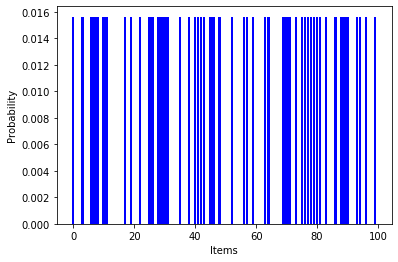

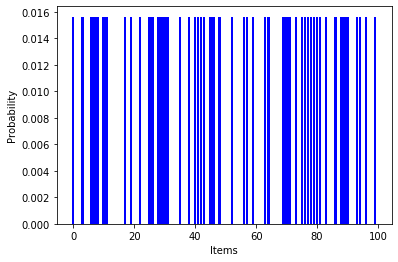

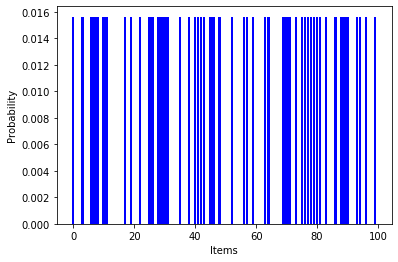

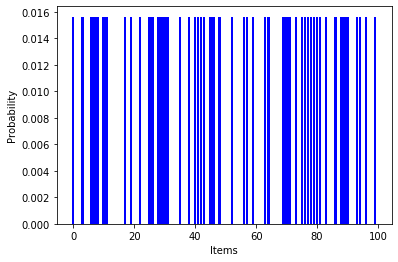

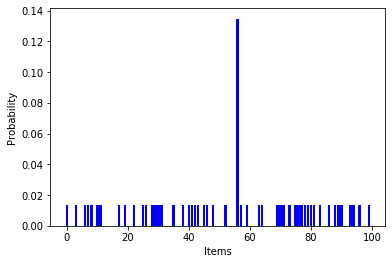

In [28]:
datalist = random.sample(range(1, 100), 50)
print(datalist)
print("Index at which element is present (-1 if absent)  : ",exponential_search(datalist,56))
result = {}
for plot in plots:
    for i in range(len(plot)):
        result[datalist[i]] = plot[i]
    plt.bar(result.keys(), result.values(),color='b') 
    plt.ylabel("Probability")
    plt.xlabel("Items")  
    plt.show()